In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC

In [2]:
mushroom = pd.read_csv('mushroom.csv')
mushroom.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
category=[col for col in mushroom.columns if mushroom[col].dtype =='O']
category.remove('class')
print(category)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [5]:
# number of unique categories in categorical column
mushroom.iloc[:,1:24].nunique()

cap_shape                    5
cap_surface                  4
cap_color                    9
bruises                      2
odor                         9
gill_attachment              4
gill_spacing                 3
gill_size                    2
gill_color                  12
stalk_shape                  2
stalk_root                   7
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    2
veil_color                   4
ring_number                  3
ring_type                    8
spore_print_color            9
population                   6
habitat                      7
class                        2
dtype: int64

In [34]:
for col in category:
    a=mushroom[col].unique()
    print(f'"{col}" categories : {a}',end='\n\n')


"cap_shape" categories : ['sunken' 'flat' 'bell' 'convex' 'conical']

"cap_surface" categories : ['scaly' 'fibrous' 'grooves' 'smooth']

"cap_color" categories : ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']

"bruises" categories : ['no' 'yes']

"odor" categories : ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']

"gill_attachment" categories : ['descending' 'notched' 'free' 'attached']

"gill_spacing" categories : ['distant' 'crowded' 'close']

"gill_size" categories : ['broad' 'narrow']

"gill_color" categories : ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']

"stalk_shape" categories : ['tapering' 'enlarging']

"stalk_root" categories : ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']

"stalk_surface_above_ring" categories : ['smooth' 'silky' 'scaly' 'fibrous']

"stalk_surface_below_ring" categories : ['silky' 'scaly' 'smooth' 'fibrous']

"stalk_color_above_r

In [35]:
# 'none' is also one category
mushroom.ring_number.value_counts()

ring_number
one     689
none    665
two     646
Name: count, dtype: int64

In [36]:
mushroom.ring_type.value_counts()

ring_type
sheathing     305
cobwebby      248
large         247
flaring       246
none          243
pendant       239
zone          237
evanescent    235
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

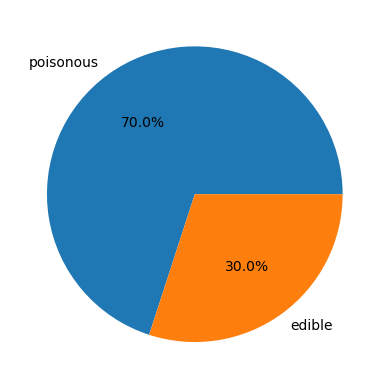

In [39]:
# it is clearly unbalanced  data
plt.pie(mushroom['class'].value_counts(),labels=mushroom['class'].unique(),autopct='%1.1f%%')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


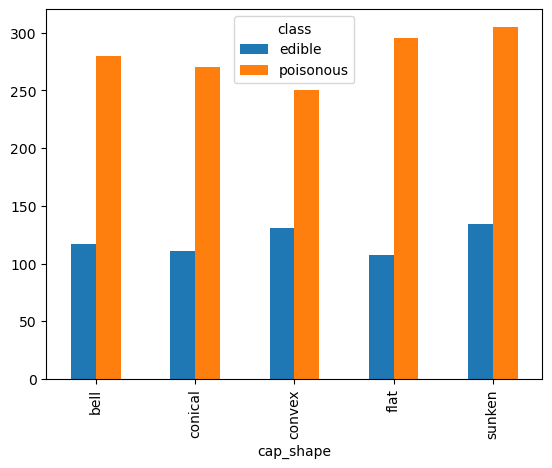

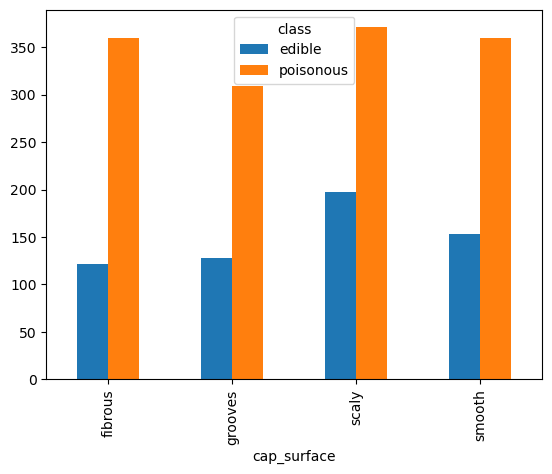

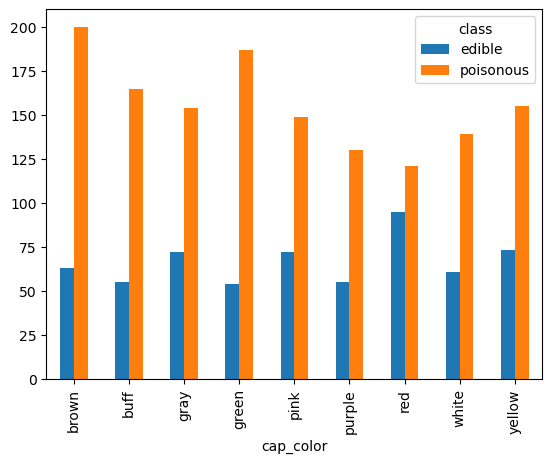

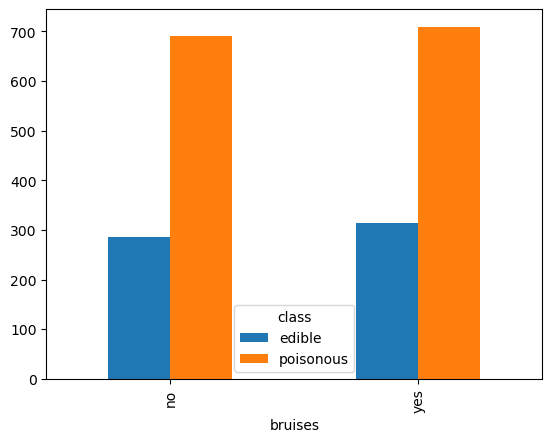

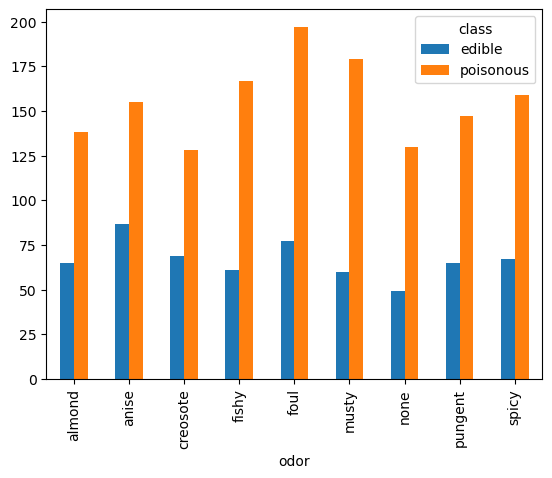

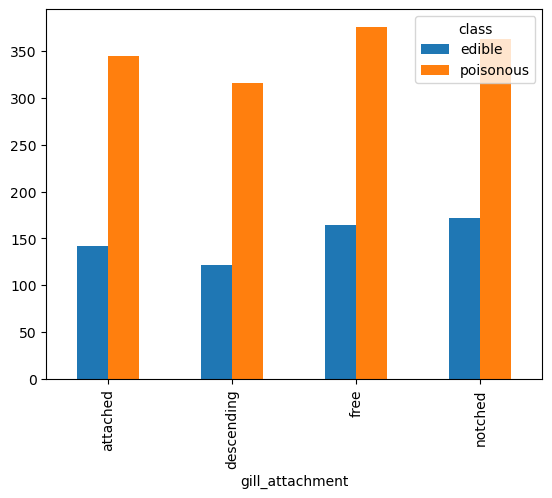

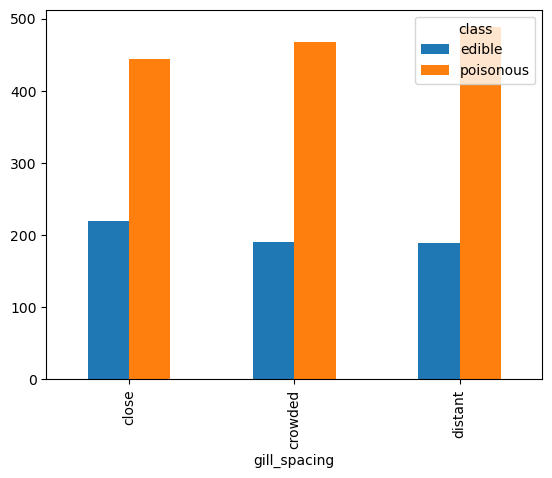

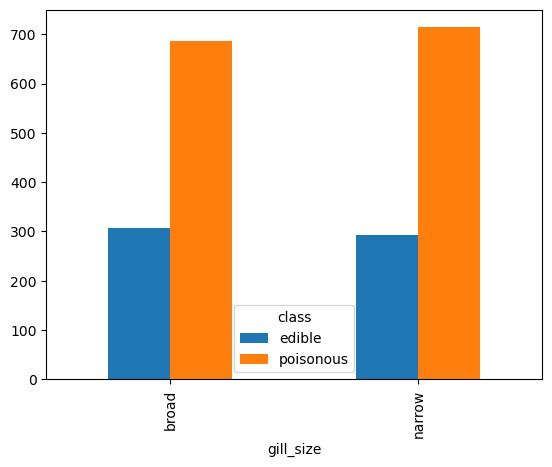

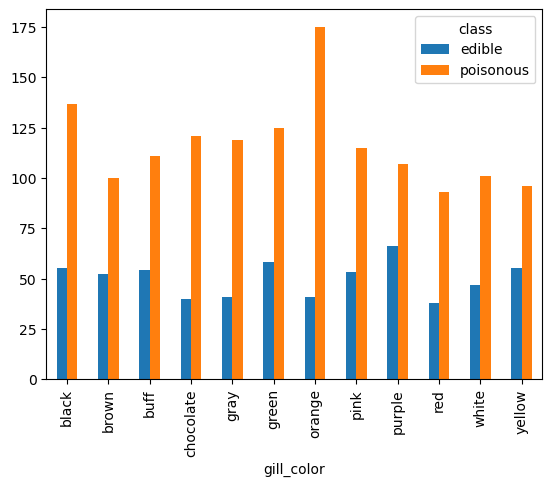

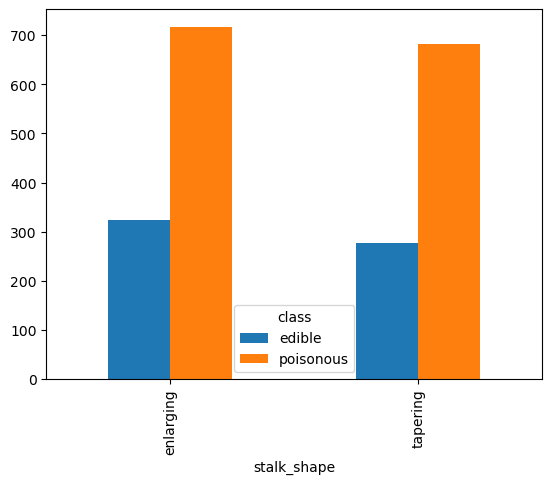

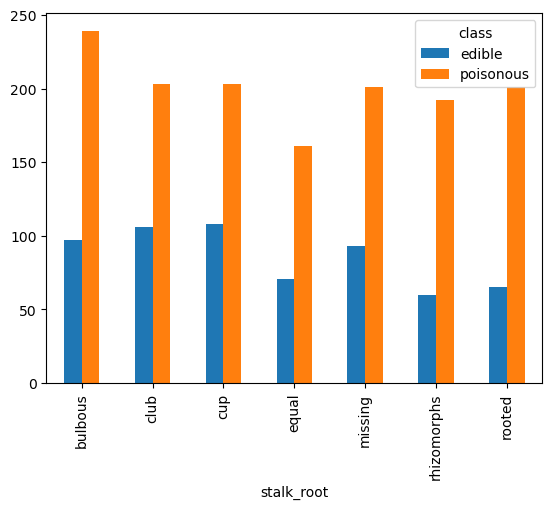

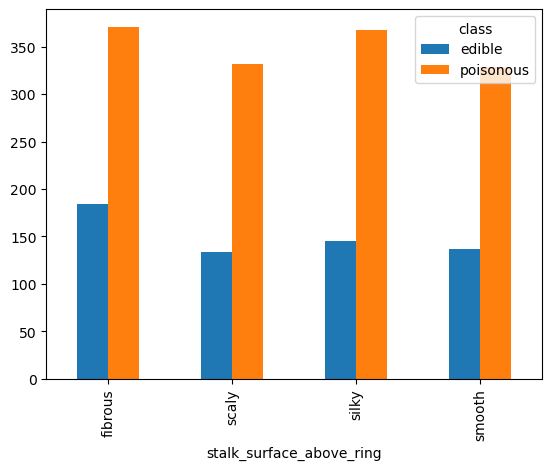

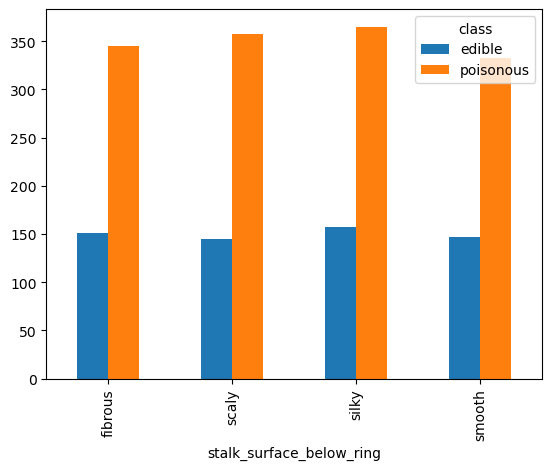

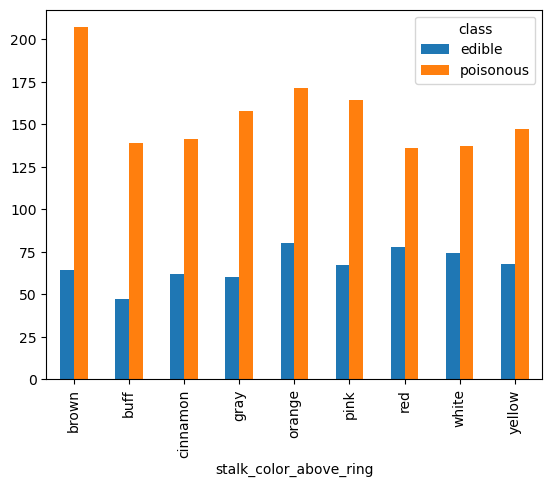

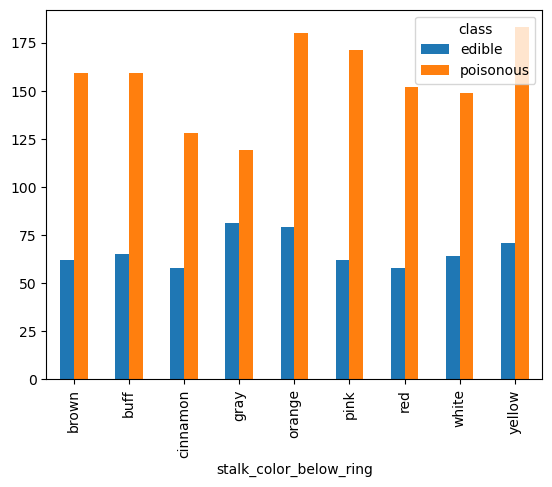

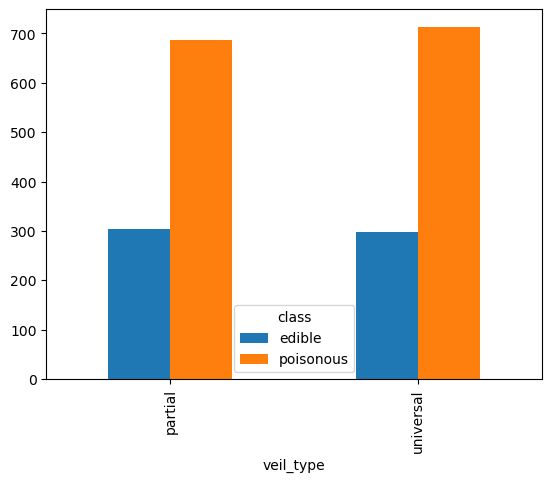

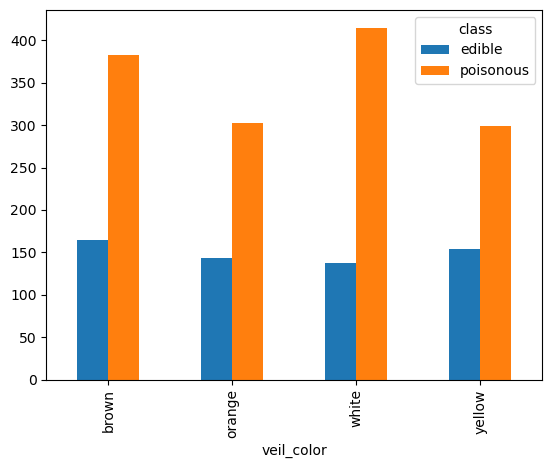

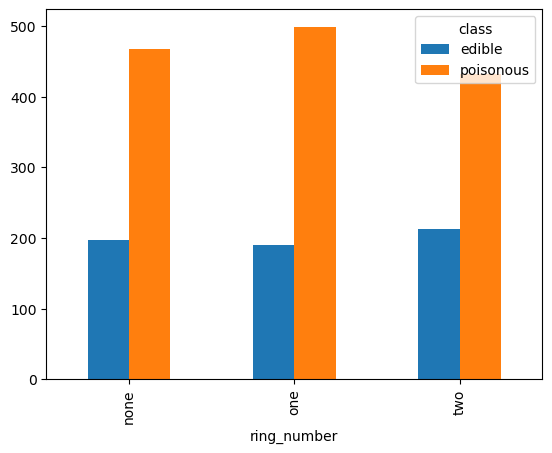

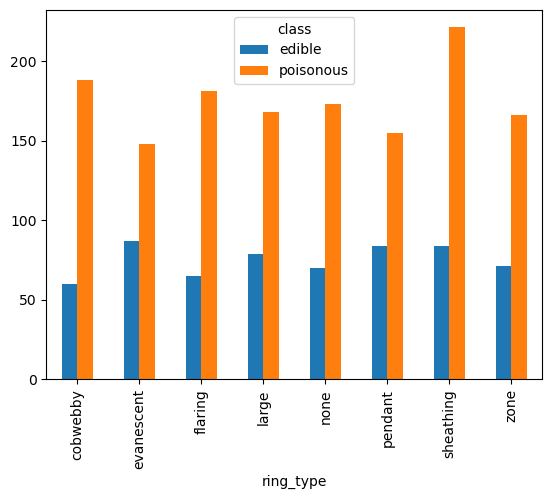

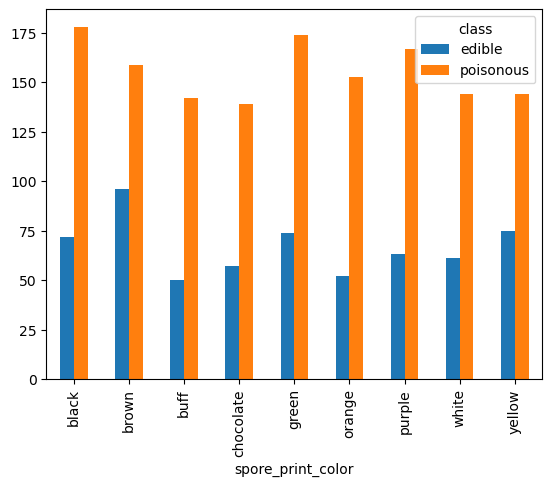

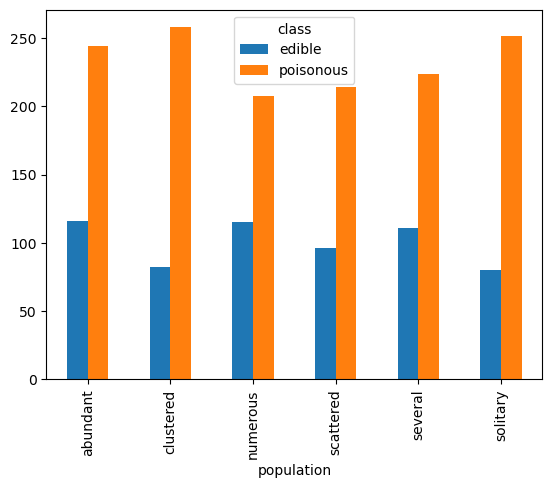

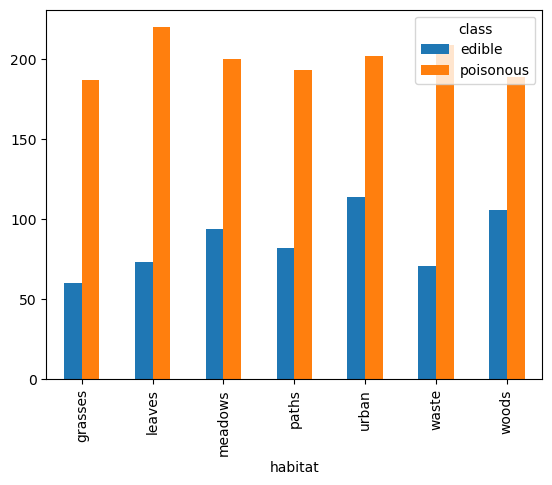

In [50]:
x=mushroom[category]
for i in x.columns :
    pd.crosstab(mushroom[i],mushroom['class']).plot(kind="bar")
plt.show()

In [59]:
mushroom.groupby('class')[['stalk_height','cap_diameter']].agg(['mean',np.std])

stalk_height           cap_diameter          
                  mean       std         mean       std
class                                                  
edible        8.526217  3.706644    12.526487  7.151795
poisonous     8.416076  3.694003    12.223427  7.004870

<Axes: >

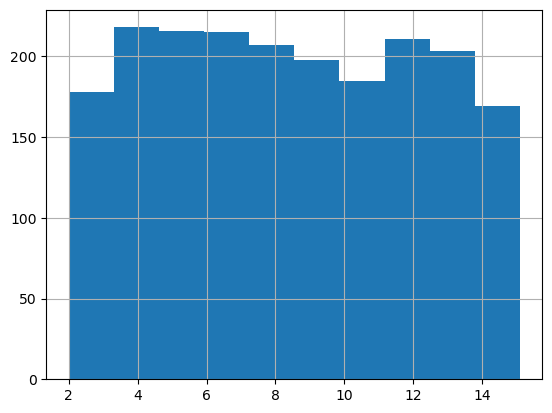

In [72]:
# normally distributed
mushroom.stalk_height.hist()

<Axes: >

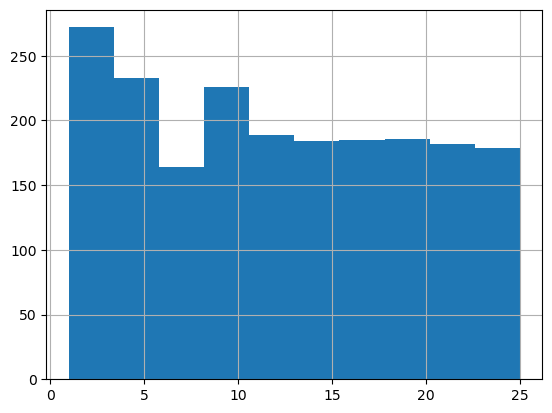

In [73]:
#normally distributed
mushroom.cap_diameter.hist()

In [74]:
mushroom['Unnamed: 0'].describe()

count    2000.000000
mean      624.974000
std       375.091938
min         0.000000
25%       290.000000
50%       607.000000
75%       957.250000
max      1279.000000
Name: Unnamed: 0, dtype: float64

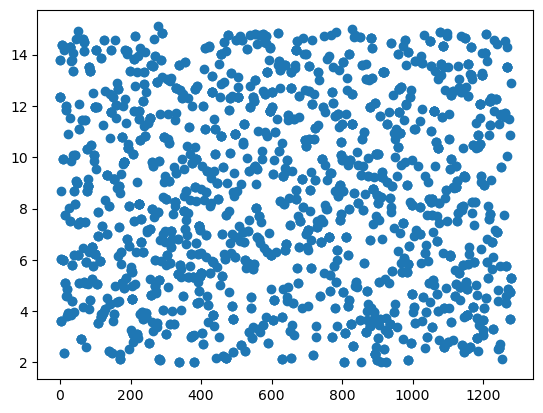

In [78]:
plt.scatter(x=mushroom['Unnamed: 0'],y=mushroom.stalk_height)
# Unnamed : 0 is not relavent lets delete this variable

# Data Preprocessing

In [6]:
mushroom.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# lets keep Class column to the last because it is easy to split independent columns & dependent columns
mush=mushroom.copy()
mush['cap_diameter']=mushroom['class']
mush['class'] = mushroom['cap_diameter']
mush.rename(columns={'cap_diameter':'class','class':'cap_diameter'},inplace=True)
mush.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,cap_diameter,stalk_height,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,5.054983,14.276173,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,19.068319,3.952715,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,7.205884,9.054265,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,20.932692,5.226499,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,12.545245,14.037532,poisonous


In [8]:
x=mush.iloc[:,:-1]
y=mush.iloc[:,-1]

In [9]:
x=pd.get_dummies(x,dtype=int)

In [10]:
x.head()

,cap_diameter,stalk_height,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,5.054983,14.276173,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,19.068319,3.952715,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.205884,9.054265,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20.932692,5.226499,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,12.545245,14.037532,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
le=LabelEncoder()
en=le.fit_transform(y)
y=pd.Series(en,name='class')

In [12]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
# RBF kernal function uses distance relation so it is mandetory to keep all variables in same scale
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Parameter Tuning and Optimization

In [14]:
model = SVC(random_state=42)

In [15]:
params ={'C':[0.5,1,10,100],'kernel':[ 'poly','rbf'],'degree':[1,2,3,4],'gamma':[1,0.1,0.01,0.001,0.0001],'coef0':[0.5,1,2,3],'class_weight':['balanced']}

In [16]:
optimal_parameters = GridSearchCV(estimator=model,param_grid=params,scoring='f1',cv=2,n_jobs=-1)
optimal_parameters.fit(X_train,Y_train)# n_jobs=-1 uses all available cores on your machine.

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.5, 1, 10, 100], 'class_weight': ['balanced'],
                         'coef0': [0.5, 1, 2, 3], 'degree': [1, 2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf']},
             scoring='f1')

In [17]:
print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

{'C': 0.5, 'class_weight': 'balanced', 'coef0': 0.5, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9087551050933526


# SVM Implementation

In [76]:
final=SVC(C=1,class_weight={1: 0.3, 0: 0.7},coef0=0.5,degree=1,kernel='rbf',gamma=1,random_state=42)
final.fit(X_train,Y_train)

SVC(C=1, class_weight={0: 0.7, 1: 0.3}, coef0=0.5, degree=1, gamma=1,
    random_state=42)

# Visualization of SVM Results

In [77]:
Y_ts_p=final.predict(X_test)

In [78]:
print(classification_report(Y_test,Y_ts_p))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400



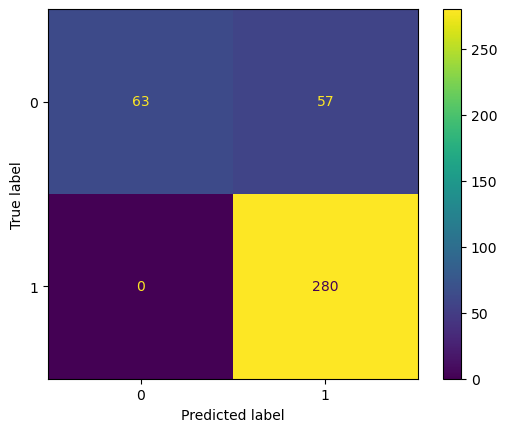

In [79]:
cm = confusion_matrix(Y_test, Y_ts_p, labels=final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final.classes_)
disp.plot()
plt.show()

# Comparison and Analysis

#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
* linear kernal is used for linearly seperable data,it is Simple, computationally efficient, and interpretable
* Polynomial Kernel identifies Nonlinear relationships with polynomial patterns.Can handle complex relationships, flexible with the degree parameter d
* Radial Basis Function (RBF) Kernel identifies Nonlinear relationships with no prior knowledge of the shape.Highly flexible, can handle complex nonlinear relationships.sensitive to hyperparameter gamma
#### 3.	Discuss practical implications of SVM in real-world classification tasks.
* SVMs are relatively robust to outliers
* SVMs can effectively handle high-dimensional data, which is common in many real-world applications.
* SVMs can handle complex, nonlinear relationships between features and the target variable
* Training SVMs can be computationally expensive, especially for large datasets or complex kernels.
*  SVM models can be difficult to interpret, making it challenging to understand how they make decisions
*  SVMs have several hyperparameters, such as C and gamma, that need to be carefully tuned to achieve optimal performance. This can be time-consuming, especially for large datasets.
####  2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
* in mushroom data set the class are imbalanced ,SVM correctly identified only 50% of minority class which is not satisfactory.even it is small dataset it consumed lot of time